# Part 3: Model Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
                        
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [2]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


## Split Input and Traget Variables

In [3]:
X = df.drop('classification', axis = 1) 
y = df['classification']

In [4]:
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (400, 25)
Shape of training dataset: (300, 24)
Shape of testing dataset: (100, 24)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []):
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### Performance of the Tarining & Test Set

In [10]:
def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:00<00:00, 39.48it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.08
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.09
XGBClassifier,1.00,1.00,1.00,1.00,0.05
RandomForestClassifier,1.00,1.00,1.00,1.00,0.15
Perceptron,1.00,1.00,1.00,1.00,0.01
BaggingClassifier,1.00,1.00,1.00,1.00,0.03
LGBMClassifier,1.00,1.00,1.00,1.00,0.07
NuSVC,0.99,0.99,0.99,0.99,0.01
LogisticRegression,0.99,0.99,0.99,0.99,0.01


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.99,1.00,0.98,1.00,1.00,0.99,0.99
1,AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,BaggingClassifier,0.97,1.00,0.98,0.97,1.00,0.98,0.97
3,KNearestNeighbors,0.99,1.00,0.98,1.00,0.98,0.99,0.99
4,RandomForest,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,BaggingRF,1.00,1.00,1.00,1.00,1.00,1.00,1.00
6,XGBoost,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,DecisionTree,0.95,0.98,0.92,0.98,1.00,0.95,0.94
8,GradientBoosting,1.00,1.00,1.00,1.00,1.00,1.00,1.00
9,GaussianNB,0.98,1.00,0.97,1.00,0.97,0.98,0.98


#### What are the top 5 models with highest Recall Score (class 1)?

In [15]:
compare = model_comparison(models, model_names)
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
1,AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,BaggingClassifier,0.99,1.00,1.00,0.98,1.00,0.99,0.99
4,RandomForest,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,BaggingRF,1.00,1.00,1.00,1.00,1.00,1.00,1.00
6,XGBoost,1.00,1.00,1.00,1.00,1.00,1.00,1.00


---------------------------------------------------------------


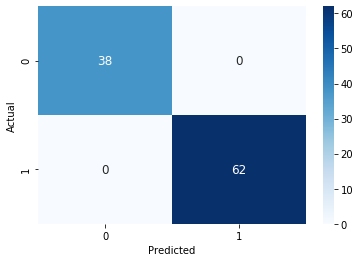

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


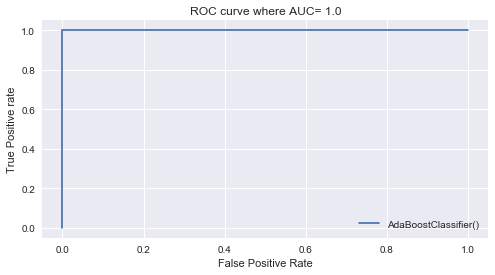

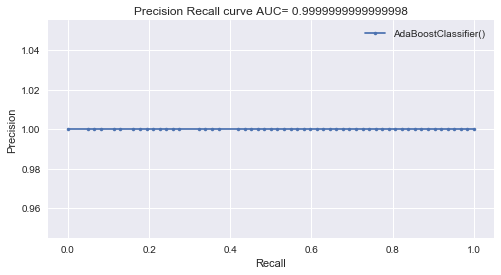

---------------------------------------------------------------


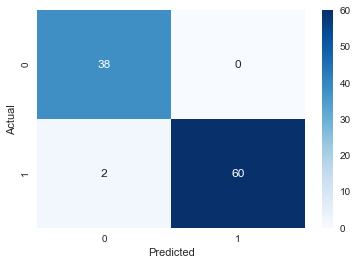

TP: 60, FP: 0, TN: 38, FN: 2
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.950     1.000     0.974        38
           1      1.000     0.968     0.984        62

    accuracy                          0.980       100
   macro avg      0.975     0.984     0.979       100
weighted avg      0.981     0.980     0.980       100

---------------------------------------------------------------
Recall Score: 0.967741935483871
Macro Average of Recall Score: 0.9838709677419355
Weighted Average of Recall Score: 0.98
---------------------------------------------------------------


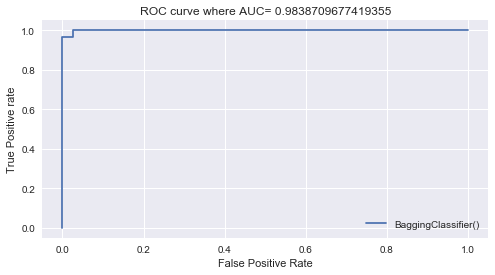

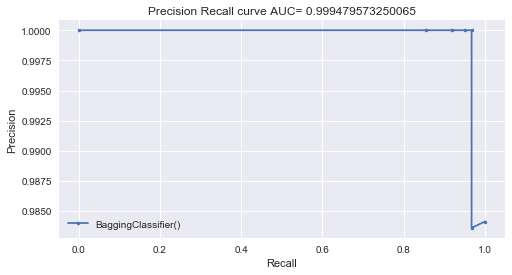

---------------------------------------------------------------


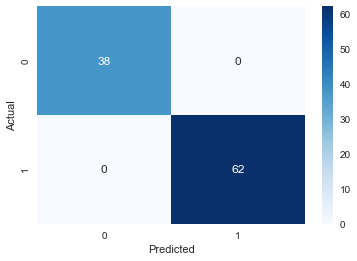

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


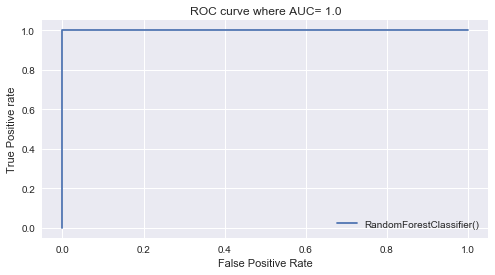

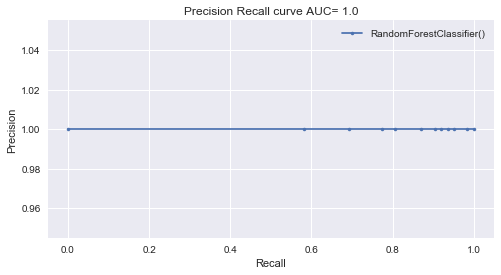

---------------------------------------------------------------


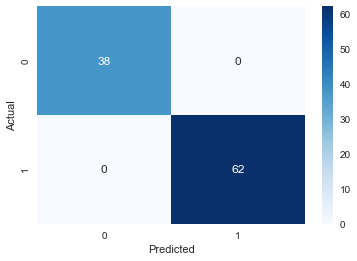

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


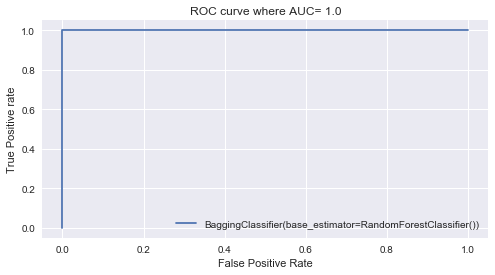

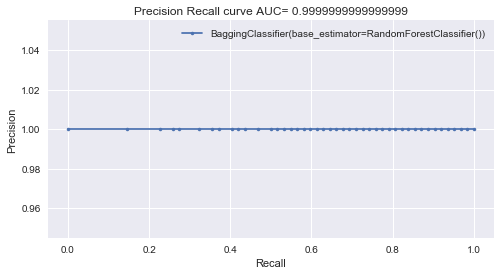

---------------------------------------------------------------


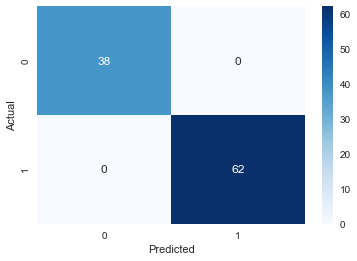

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


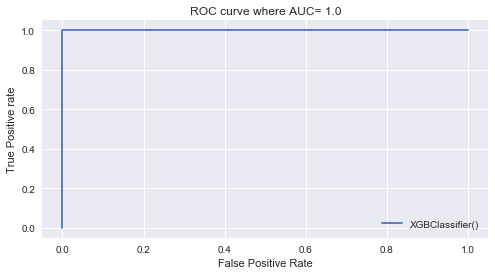

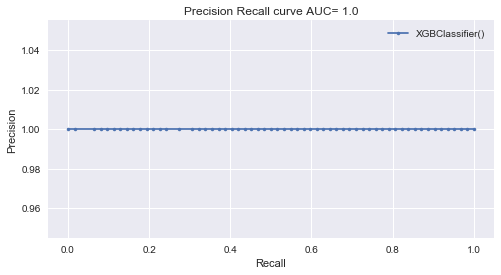

In [16]:
models = [AdaBoostClassifier(), BaggingClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier()]
roc_pr_cm(models)

### Model Selected: RandomForestClassifier()

#### We want *smaller False Negative* value and *larger True Positive* Value in our case. Also, we want to mitigate the class imbalance problem.

- Recall Score: 1.0
- Macro Average of Recall Score: 1.0
- Weighted Average of Recall Score: 1.0

In [17]:
from sklearn import model_selection
from pprint import pprint

random = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [18]:
random.fit(X_train, y_train)
y_hat = random.predict(X_test)
y_hat_train = random.predict(X_train)

In [19]:
macro_weighted_prec_rec(y_test, y_hat)

Recall Score: 1.0
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
.
Macro Average of Precision Score: 1.0
Weighted Average of Precision Score: 1.0
Macro Average of F1 Score: 1.0
Weighted Average of F1 Score: 1.0
.
Accuracy: 1.0


Accuracy Score of Train Set: 1.0
Accuracy Score of Test Set: 1.0
.
F1 Score of Train Set: 1.0
F1 Score of Test Set: 1.0


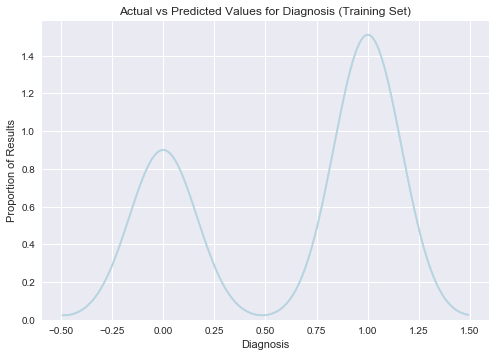

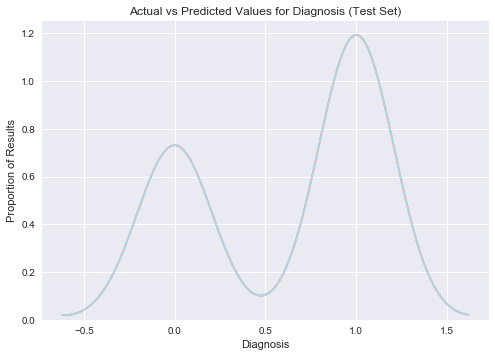

In [20]:
f1_acc(y_test, y_hat, y_train, y_hat_train)

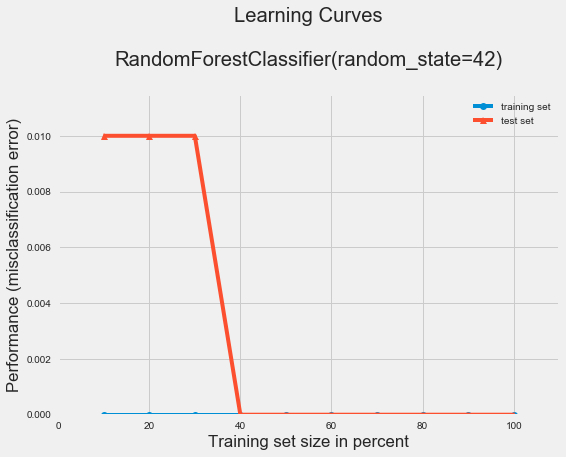

In [21]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, random)
plt.show()

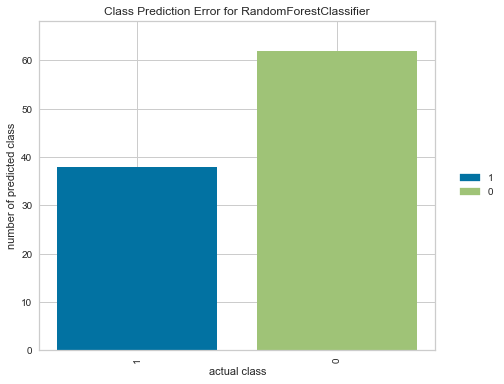

In [22]:
classes = [1, 0]

from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state = 42), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()